<a href="https://colab.research.google.com/github/shubham2721/Data-Analysis-With-Python/blob/main/UBER_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## UBER DATA Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Uber+Drives+-+.csv')

In [ ]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# Checking for all the missing values

In [ ]:
# this function checks the NAN value and put true in column
df.isnull().any() 

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [ ]:
# for knowing how much NAN contains in the columns
print(df.isnull().value_counts())

START_DATE*  END_DATE*  CATEGORY*  START*  STOP*  MILES*  PURPOSE*
False        False      False      False   False  False   False       653
                                                          True        502
             True       True       True    True   False   True          1
dtype: int64


In [ ]:
# or 
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

There is the function to drop all the rows having single
NAN values but this should be the last option as this will impact a dataset we can analyze the others columns and fill the NAN values like taking averages, or common values from other columns categories

- For droping rows having a single NAN **df.dropna()**
- For droping the rows having all the columns with NAN values **df.dropna(how = 'all')**
- For droping the rows having NAN value in particular column **df.dropna(subset= ['xyz'])**

In [ ]:
df1 = df.copy()

In [ ]:
df1.shape

(1156, 7)

In [ ]:
df1.dropna(subset = ['END_DATE*'])

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [ ]:
uber_df = df.copy()

In [ ]:
# for droping all the rows having NAN value
uber_df.dropna(inplace = True)

In [ ]:
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [ ]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [ ]:
uber_df['START_DATE*'] = pd.to_datetime(uber_df['START_DATE*'], format ='%m/%d/%Y %H:%M')
uber_df['END_DATE*'] = pd.to_datetime(uber_df['END_DATE*'], format ='%m/%d/%Y %H:%M')

In [ ]:
uber_df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [ ]:
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [ ]:
hour = []
day = []
dayofweek = []
month = []
weekday = []
for x in uber_df['START_DATE*']:
  hour.append(x.hour)
  day.append(x.day)
  dayofweek.append(x.dayofweek)
  month.append(x.month)
  weekday.append(calendar.day_name[dayofweek[-1]])

uber_df['Hour'] = hour
uber_df['DAY'] = day
uber_df['Day of Week'] = dayofweek
uber_df['Month'] = month
uber_df['Weekday'] = weekday

In [ ]:
# or you can apply this
uber_df['New Hour'] = uber_df['START_DATE*'].apply(lambda x : x.dayofweek)

In [ ]:
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,DAY,Day of Week,Month,Weekday,New Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,5,12,Saturday,5
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,5,12,Saturday,5
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,5,12,Saturday,5
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,12,Saturday,5


In [ ]:
uber_df.drop(columns = ['New Hour'], inplace= True)

In [ ]:
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,DAY,Day of Week,Month,Weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,5,12,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,5,12,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,5,12,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,12,Saturday


In [ ]:
uber_df['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

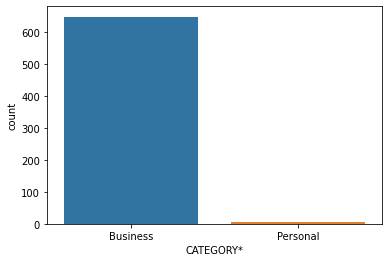

In [ ]:
sns.countplot(x ='CATEGORY*', data = uber_df)

In [ ]:
uber_df['counting'] = 1

How long do people travel with Uber

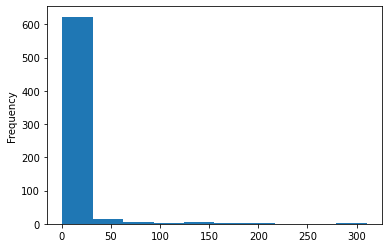

In [ ]:
uber_df['MILES*'].plot.hist()

What hour Do people take uber to their destination

In [ ]:
uber_df1 = uber_df.groupby('Hour').sum()
uber_df1

,MILES*,DAY,Day of Week,Month,counting
Hour,,,,,
0,75.7,182,41,85,13
1,36.8,84,14,31,4
2,159.3,3,6,4,1
3,55.2,29,10,12,3
5,30.5,47,10,13,3
6,31.4,31,1,8,2
7,60.4,129,28,61,8
8,145.2,234,39,95,17
9,256.7,413,77,148,26


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'NO. of Ride Booked'), Text(0.5, 0, 'Hours in Day')]

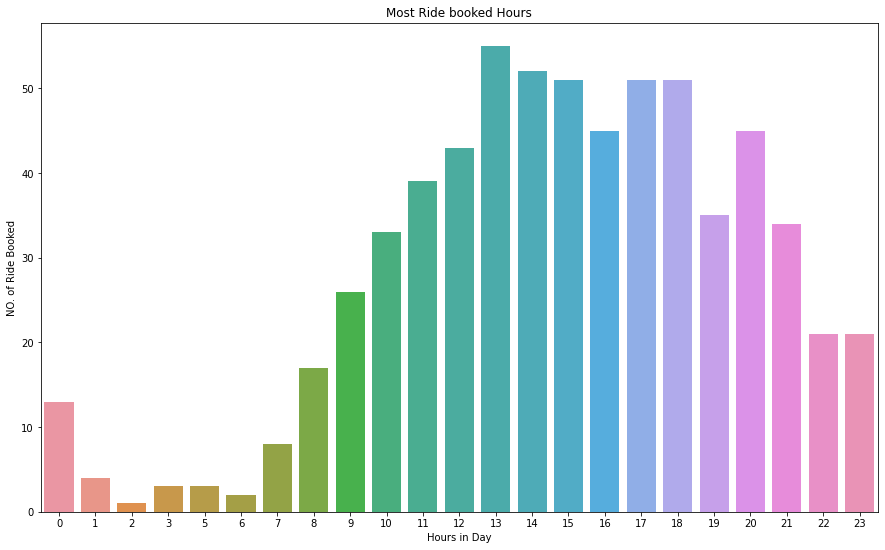

In [ ]:
plt.figure(figsize = (15,9))
plt.title('Most Ride booked Hours')
new = sns.barplot( uber_df1.index, uber_df1['counting'])
new.set(xlabel = 'Hours in Day', ylabel = 'NO. of Ride Booked')

In [ ]:
ub = uber_df.groupby(['Hour','CATEGORY*']).sum()
ub.value_counts()

MILES*  DAY  Day of Week  Month  counting
770.9   655  134          236    45          1
632.4   899  150          344    55          1
23.1    53   6            21     3           1
30.5    47   10           13     3           1
31.4    31   1            8      2           1
36.8    84   14           31     4           1
55.2    29   10           12     3           1
60.4    129  28           61     8           1
75.7    182  41           85     13          1
145.2   234  39           95     17          1
159.3   3    6            4      1           1
180.2   17   6            7      1           1
212.0   496  109          237    34          1
256.7   413  77           148    26          1
298.1   562  84           201    31          1
324.3   717  116          227    36          1
325.8   816  148          339    51          1
328.0   301  69           146    21          1
373.4   345  70           163    21          1
427.2   543  119          261    35          1
451.5   791  172  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


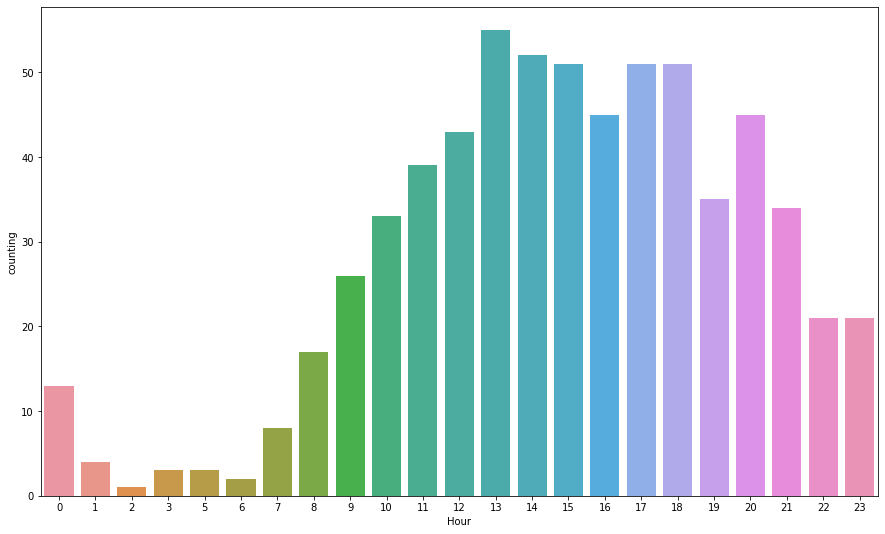

In [ ]:
plt.figure(figsize=(15,9))
sns.barplot(uber_df.groupby('Hour').sum().index,uber_df1['counting'])

## Purpose OF Trips 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

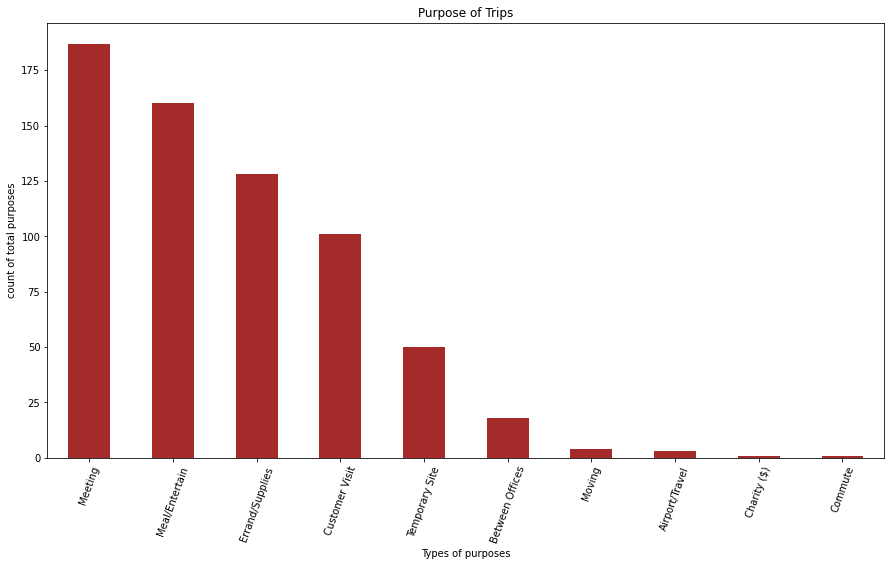

In [ ]:
# Another way to plot a graph using matplotlib
uber_df['PURPOSE*'].value_counts().plot(kind = 'bar',figsize=(15,8), color ='brown')
plt.xlabel('Types of purposes')
plt.ylabel('count of total purposes')
plt.title('Purpose of Trips')
plt.xticks(rotation = 70)

## Which Day has the highest number of Trips

In [ ]:
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,DAY,Day of Week,Month,Weekday,counting
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,1
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,5,12,Saturday,1
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,5,12,Saturday,1
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,5,12,Saturday,1
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,12,Saturday,1


In [ ]:
highest_day = uber_df.groupby('Weekday').sum()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


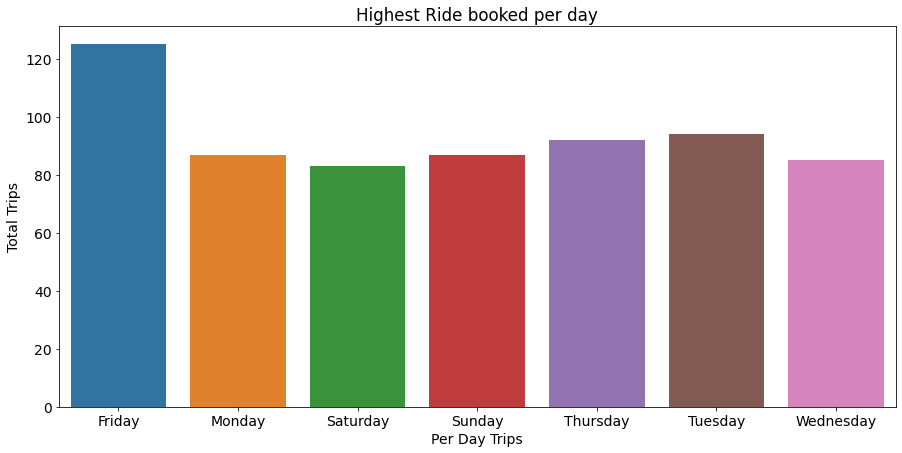

In [ ]:
# Graph using SNS (this will not sort according to highest to lowest)
import matplotlib as mlt
plt.figure(figsize=(15,7))
mlt.rcParams['font.size'] = 14
graph = sns.barplot(highest_day.index, highest_day['counting'])
graph.set(xlabel = 'Per Day Trips', ylabel = 'Total Trips')
plt.title('Highest Ride booked per day');

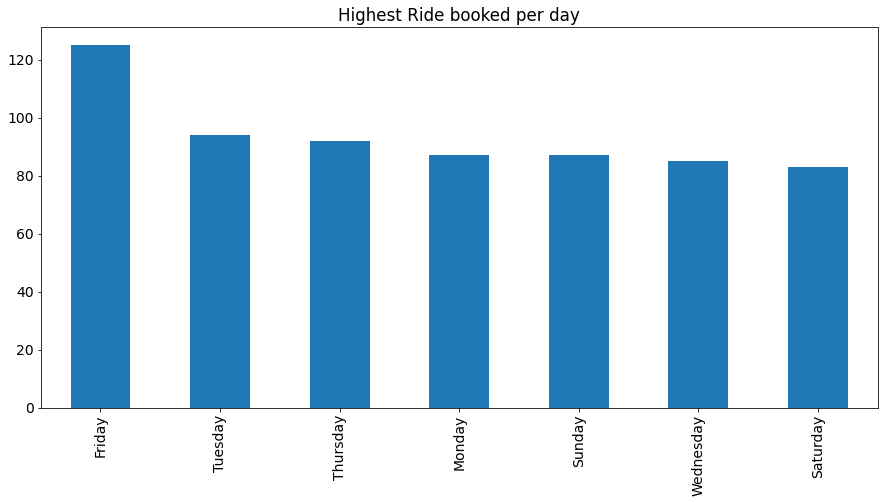

In [ ]:
# Graph using Matplotlib (This will thorw the graph based on lowest to highest)
plt.figure(figsize=(15,7))
mlt.rcParams['font.size'] = 14
uber_df['Weekday'].value_counts().plot(kind ='bar') # use line 
plt.title('Highest Ride booked per day');


## What are the number of trips per Each Day

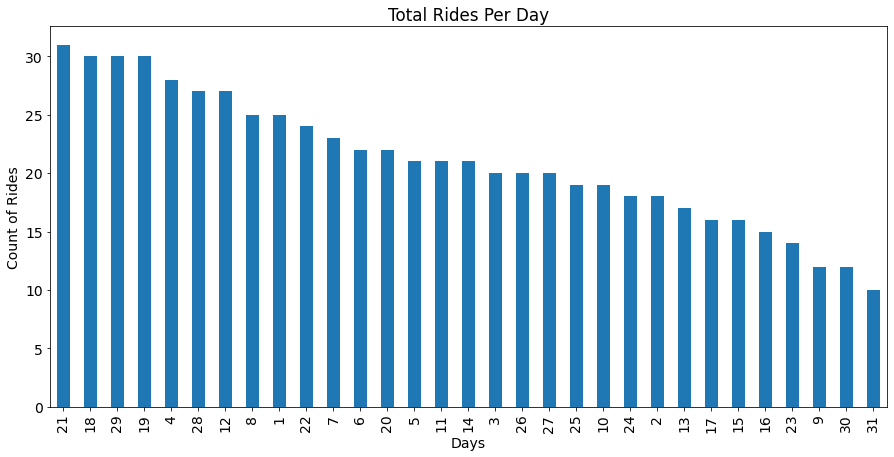

In [ ]:
# Graph using Matplotlib
plt.figure(figsize=(15,7))
mlt.rcParams['font.size'] = 14
uber_df['DAY'].value_counts().plot(kind ='bar')
plt.xlabel('Days')
plt.ylabel('Count of Rides')
plt.title('Total Rides Per Day');

##What are the number of Rides per month

In [ ]:
# for using this the columns should be in date time format
uber_df['Month'] = uber_df['START_DATE*'].dt.strftime('%b') 
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,DAY,Day of Week,Month,Weekday,counting
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,Jan,Friday,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,Jan,Saturday,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Jan,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,Jan,Wednesday,1
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,Jan,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,5,Dec,Saturday,1
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,5,Dec,Saturday,1
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,5,Dec,Saturday,1
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,Dec,Saturday,1


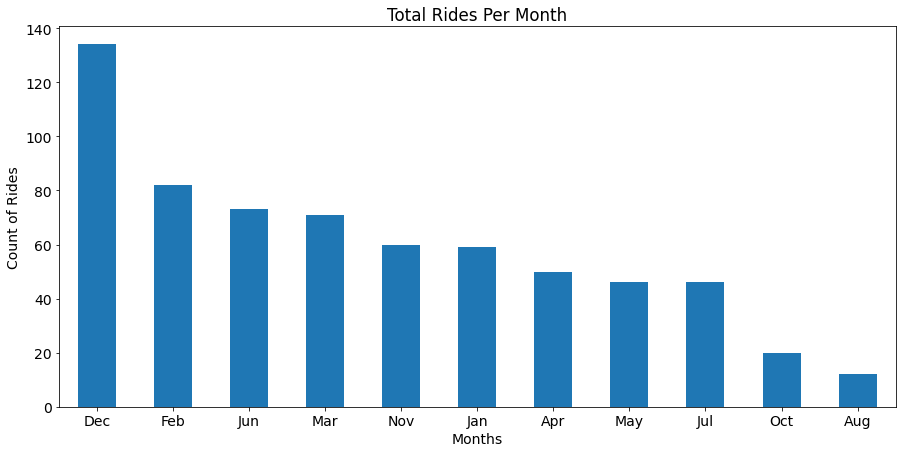

In [ ]:
# Graph using Matplotlib
plt.figure(figsize=(15,7))
mlt.rcParams['font.size'] = 14
uber_df['Month'].value_counts().plot(kind ='bar')
plt.xlabel('Months')
plt.ylabel('Count of Rides')
plt.xticks(rotation ='0')
plt.title('Total Rides Per Month');

In [ ]:
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,DAY,Day of Week,Month,Weekday,counting
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,Jan,Friday,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,Jan,Saturday,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Jan,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,Jan,Wednesday,1
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,Jan,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,5,Dec,Saturday,1
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,5,Dec,Saturday,1
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,5,Dec,Saturday,1
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,Dec,Saturday,1


# Starting Points of the Trips

In [ ]:
start_point = uber_df.groupby('START*').sum().sort_values(by = 'counting', ascending = False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


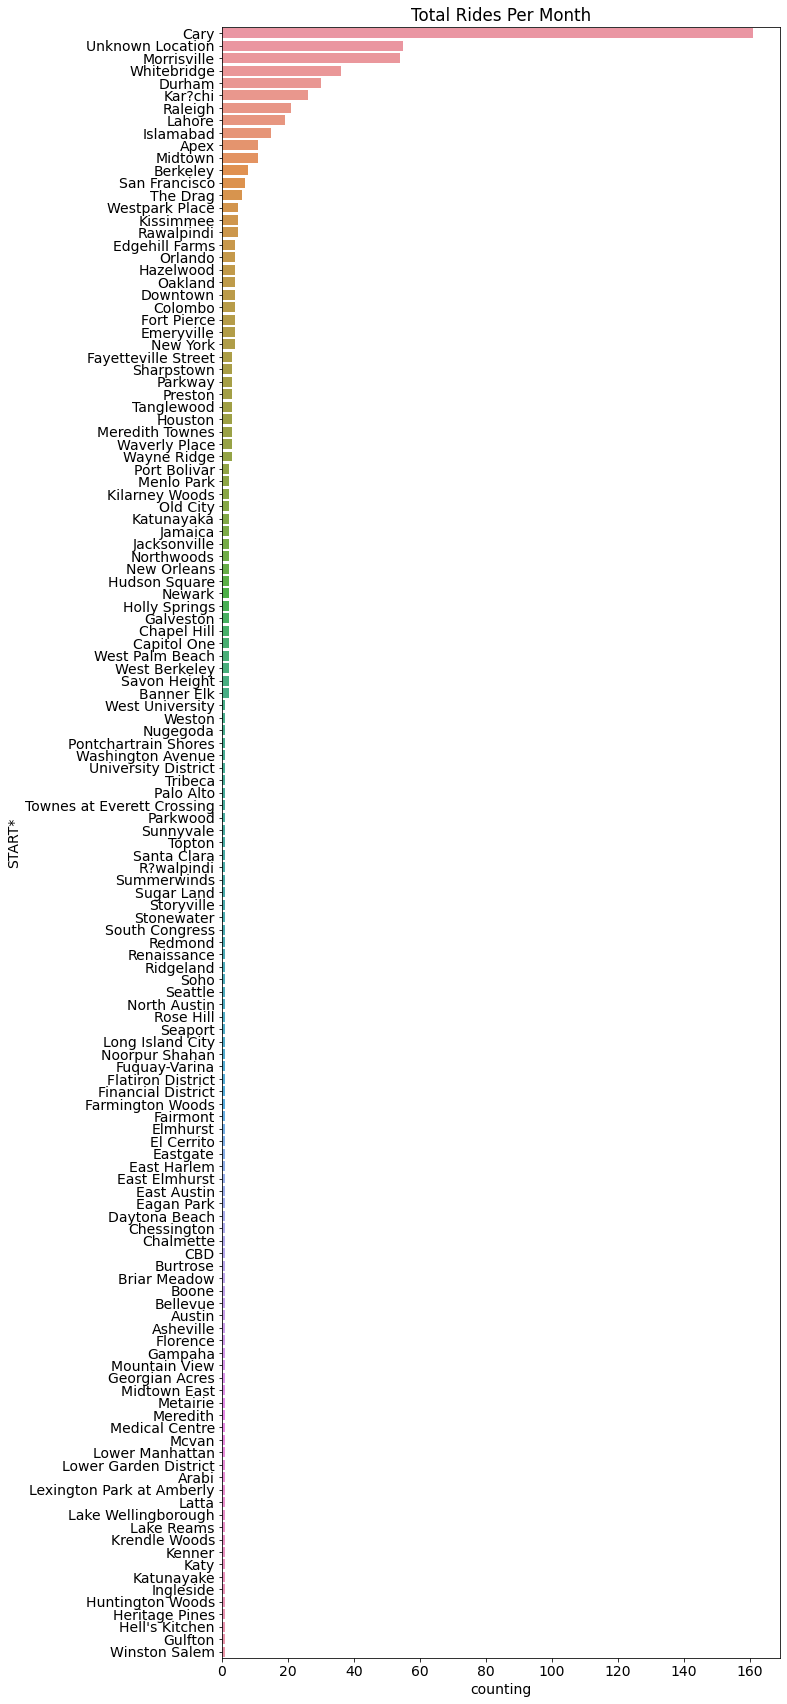

In [ ]:
plt.figure(figsize=(10,30))
mlt.rcParams['font.size'] = 14
sns.barplot(start_point['counting'], start_point.index)
plt.title('Total Rides From Starting Point');